# Factores de riesgo
Este proyecto se corresponde al trabajo final del curso de Data Science dictado por la Fundación YPF en el año 2024.

## Objetivos del notebook 

A partir del dataset en crudo del INDEC, se obtendrá una versión delimitada utilizando las columnas que sean útiles para trabajar, alineándose con el objetivo general del proyecto. Las acciones a realizar para lograrlo son:

+ Delimitar los bloques temáticos
+ Crear columnas derivadas de otras
+ Renombrar todas las columnas del dataset
+ Determinar el tipo de variables

Luego, se exportará un archivo CSV que servirá de entrada al EDA.

## Setup de archivos

__Importación de librerías__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sns

from functools import reduce

from utils.funcions import *
from utils.codificaciones import *

__Importación de base de datos__

In [2]:
friesgo_2018_raw = pd.read_csv('datasets/friesgo_2018_raw.txt', delimiter = '|')

## Análisis estructural del dataset raw

Se pretende conocer los datos generales acerca de la estructura del dataset raw (proveniente del INDEC) para poder tratarlo a posteriori de una manera adecuada.

In [3]:
# Determinar filas y columnas
friesgo_2018_raw.shape

(29224, 287)

In [4]:
# Obtener las 5 primeras filas del dataset
friesgo_2018_raw.head()

,id,cod_provincia,region,tamanio_aglomerado,aglomerado,localidades_150,submuestra,bhcv01,bhcv02,bhcv03,...,glucemia_elevada,prevalencia_glucemia_elevada_combinada,findrisc,bimq06,bimq06_01,colesterol_elevado,prevalencia_colesterol_combinada,wf1p,wf2p,wf3p
0,1128639,2,1,1,1,1,1,3,2,1,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2378,4464,0
1,1709939,2,1,1,1,1,0,1,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3588,0,0
2,6874130,2,1,1,1,1,0,3,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2740,0,0
3,10319375,2,1,1,1,1,1,3,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,493,0,0
4,11140857,2,1,1,1,1,0,3,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,0,0


In [5]:
pd.set_option('display.max_columns',None)
print(friesgo_2018_raw.columns.tolist())

['id', 'cod_provincia', 'region', 'tamanio_aglomerado', 'aglomerado', 'localidades_150', 'submuestra', 'bhcv01', 'bhcv02', 'bhcv03', 'bhcv04', 'bhcv05', 'bhcv06', 'bhcv07', 'bhcv08', 'bhcv09', 'bhcv10', 'bhcv11', 'bhho01', 'bhho02', 'bhho03', 'cant_componentes', 'miembros_18', 'tipo_hogar', 'bhih01', 'bhih01_02', 'rango_ingreso', 'quintil_uc', 'imputado', 'bhih03', 'bhch03_j', 'bhch04_j', 'rango_edad_j', 'bhch05_j', 'nivel_instruccion_j', 'nivel_instruccion_agrupado_j', 'bhch10_01_j', 'bhch10_02_j', 'bhch10_03_j', 'bhch10_04_j', 'bhch10_05_j', 'bhch10_06_j', 'bhch10_99_j', 'cobertura_salud_j', 'bhsl01', 'bhsl02', 'bhsl03', 'bhsl04', 'bhsl05', 'bhsl06', 'condicion_actividad_j', 'bhch02', 'bhch03', 'bhch04', 'rango_edad', 'bhch05', 'nivel_instruccion', 'nivel_instruccion_agrupado', 'bhch10_01', 'bhch10_02', 'bhch10_03', 'bhch10_04', 'bhch10_05', 'bhch10_06', 'bhch10_99', 'cobertura_salud', 'bisl01', 'bisl02', 'bisl03', 'bisl04', 'bisl05', 'bisl06', 'condicion_actividad', 'bisg01', 'bisg0

## Búsqueda y localización de columnas

In [6]:
# Ubicacion
ubicacion_raw = pd.DataFrame(friesgo_2018_raw.iloc[:, list(range(0,7))]).copy()
# USAR EL SIGUIENTE CODIGO :
# bloquetematico_raw = pd.DataFrame(friesgo_2018_raw.iloc[:, [0] + list(range(inicio,final))]).copy()

In [7]:
# Caracteristicas del encuestado
# Busqueda de la columna a añadir que describe la situacion laboral del individuo
# friesgo_2018_raw.columns.get_loc('condicion_actividad')
caract_encuestado_raw = pd.DataFrame(friesgo_2018_raw.iloc[:, [0] + list(range(51,66)) + [72]]).copy()

In [8]:
# Tabaquismo
tabaquismo_raw = pd.DataFrame(friesgo_2018_raw.iloc[:, [0] + list(range(98, 133))]).copy()

In [9]:
# Salud general
salud_raw = pd.DataFrame(friesgo_2018_raw.iloc[:, [0] + list(range(73,78))]).copy()

In [10]:
# Actividad física
actividad_fisica_raw = pd.DataFrame(friesgo_2018_raw.iloc[:, [0] + list(range(79,98))]).copy()

In [11]:
# Hipertension arterial
hipertension_raw = pd.DataFrame(friesgo_2018_raw.iloc[:, [0] + list(range(140,159))]).copy()

In [12]:
# Peso corporal
peso_raw = pd.DataFrame(friesgo_2018_raw.iloc[:, [0] + list(range(160,169))]).copy()

In [13]:
# Alimentacion
alimentacion_raw = pd.DataFrame(friesgo_2018_raw.iloc[:, [0] + list(range(169,186))]).copy()

In [14]:
# Colesterol
colesterol_raw = pd.DataFrame(friesgo_2018_raw.iloc[:, [0] + list(range(187,195))]).copy()

In [15]:
# Consumo de alcohol
consumo_alcohol_raw = pd.DataFrame(friesgo_2018_raw.iloc[:, [0] + list(range(195,217))]).copy()

In [16]:
# Diabetes
diabetes_raw = pd.DataFrame(friesgo_2018_raw.iloc[:, [0] + list(range(218, 236))]).copy()

In [17]:
# Mediciones atropometricas
mediciones_antropometricas_raw = pd.DataFrame(friesgo_2018_raw.iloc[:, [0] + list(range(252, 273))]).copy()

In [18]:
# Mediciones bioquimicas
mediciones_bioquimicas_raw = pd.DataFrame(friesgo_2018_raw.iloc[:, [0] + list(range(274, 283))]).copy()

## Tratamiento de columnas del dataset raw

### UBICACIÓN

In [19]:
# filtrado de las columnas que seran utiles
ubicacion = ubicacion_raw.filter(items=['id', 'cod_provincia', 'tamanio_aglomerado', 'submuestra'])

### CARACTERÍSTICAS DEL ENCUESTADO

In [20]:
# Renombro
caract_encuestado_raw.rename(columns = {
    'bhch02': 'relacion_jefeh',
    'bhch03': 'sexo',
    'bhch04': 'edad',
    'rango_edad': 'rango_etario',
    'bhch05': 'situacion_conyugal',
    'nivel_instruccion': 'nivel_educ',
    'nivel_instruccion_agrupado': 'nivel_eduG',
    'bhch10_01': 'obra_social',
    'bhch10_02': 'o_social_prep',
    'bhch10_03': 'o_soc_pre_vol',
    'bhch10_04': 'sem',
    'bhch10_05': 'asoc_prog_salud_estatal',
    'bhch10_06': 'no_asociado_nada',
    'bhch10_99': 'nosabe'
}, inplace= True)


In [21]:
#Filtrado de columnas necesarias
caract_encuestado = caract_encuestado_raw.filter(items=['id', 'sexo', 'edad','situacion_conyugal', 'nivel_educ', 'cobertura_salud'])

### SALUD GENERAL

In [22]:
# Renombre de columnas
salud_raw.rename(columns = {
    #SALUD GENERAL 
"bisg01" : "salud_actual",
"bisg02" : "nivel_de_movilidad",
"bisg03" : "capacidad_cuidado_personal",
"bisg04" : "capacidad_actividades_cotidianas",
"bisg05" : "dolor_malestar_general",
"bisg06" : "ansiedad_depresion"
}, inplace = True)

In [54]:
salud_raw.head()

,id,salud_actual,nivel_de_movilidad,capacidad_cuidado_personal,capacidad_actividades_cotidianas,dolor_malestar_general
0,1128639,3,1,1,1,1
1,1709939,1,1,1,1,1
2,6874130,2,1,1,1,1
3,10319375,3,1,1,1,2
4,11140857,3,1,1,1,1


<Axes: >

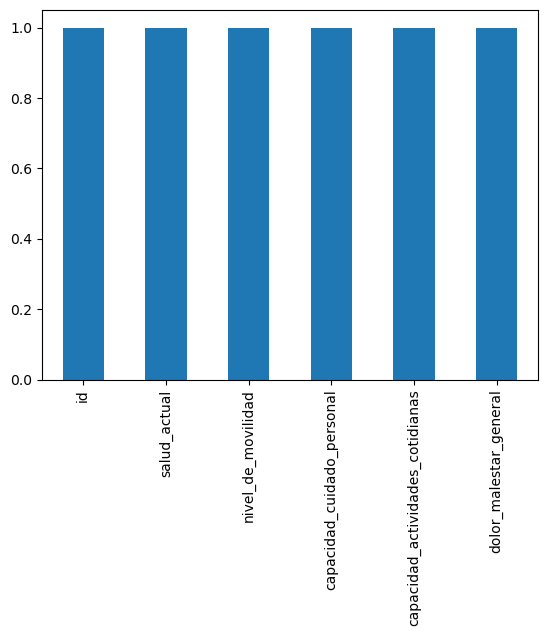

In [23]:
#análisis de nulos en el subset SALUD GENERAL
#Análisis gráfico de la composición de no nulos en cada columna
a1_salud=(salud_raw.notna().sum(axis = 0)  /  len(salud_raw))
a1_salud.plot.bar()

De este subset se aconseja mantener para el análisis a las columnas: 
"salud_actual"
"capacidad_actividades_cotidianas"
"dolor_malestar_general"
"ansiedad_depresion"

### ACTIVIDAD FÍSICA

In [24]:
# Renombre de columnas
actividad_fisica_raw.rename(columns = {
    #ACTIVIDAD FÍSICA af
"biaf01" : "af_intensa_veces_por_semana",
"biaf02_m" : "af_intensa_min_totales_por_semana",
"biaf02_99" : "af_intensa_min_totales_por_semana_nsnc",
"biaf03" : "af_moderada_veces_por_semana",
"biaf04_m" : "af_moderada_min_totales_por_semana",
"biaf04_99" : "actividad_fisica_moderada_min_totales_por_semana_nsnc",
"biaf05" : "caminata_veces_por_semana",
"biaf06_m" : "caminata_min_totales_por_semana",
"biaf06_99" : "caminata_min_totales_por_semana_nsnc",
"biaf07_m" : "tiempo_sentado_min_por_dia",
"biaf07_99" : "tiempo_sentado_min_por_dia_nsnc",
"biaf08" : "razon_ninguna_actividad_la_ultima_semana",
"biaf09" : "razon_poca_actividad_la_ultima_semana",
"biaf10_01" : "af_fue_actividad_domestica",
"biaf10_02" : "af_fue_actividad_laboral",
"biaf10_03" : "af_fue_traslado",
"biaf10_04" : "af_fue_deporte"
#nivel_actividad_fisica mantiene el mismo nombre
#barreras_actividad_fisica mantiene el mismo nombre

}, inplace = True)

In [57]:
actividad_fisica_raw.head()

,id,af_intensa_veces_por_semana,af_intensa_min_totales_por_semana,af_intensa_min_totales_por_semana_nsnc,af_moderada_veces_por_semana,af_moderada_min_totales_por_semana,actividad_fisica_moderada_min_totales_por_semana_nsnc,caminata_veces_por_semana,caminata_min_totales_por_semana,caminata_min_totales_por_semana_nsnc,tiempo_sentado_min_por_dia,tiempo_sentado_min_por_dia_nsnc,razon_ninguna_actividad_la_ultima_semana,razon_poca_actividad_la_ultima_semana,af_fue_actividad_domestica,af_fue_actividad_laboral,af_fue_traslado,af_fue_deporte,nivel_actividad_fisica,barreras_actividad_fisica
0,1128639,4,500.0,NaN,4,120.0,NaN,7,300.0,NaN,480.0,NaN,NaN,2.0,2.0,2.0,1.0,1.0,1.0,1
1,1709939,3,210.0,NaN,1,30.0,NaN,7,180.0,NaN,600.0,NaN,NaN,2.0,2.0,1.0,1.0,1.0,1.0,1
2,6874130,0,NaN,NaN,3,180.0,NaN,7,270.0,NaN,540.0,NaN,NaN,10.0,1.0,1.0,1.0,1.0,2.0,9
3,10319375,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,120.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,3.0,1
4,11140857,0,NaN,NaN,2,180.0,NaN,7,120.0,NaN,480.0,NaN,NaN,2.0,1.0,1.0,1.0,2.0,2.0,1


<Axes: >

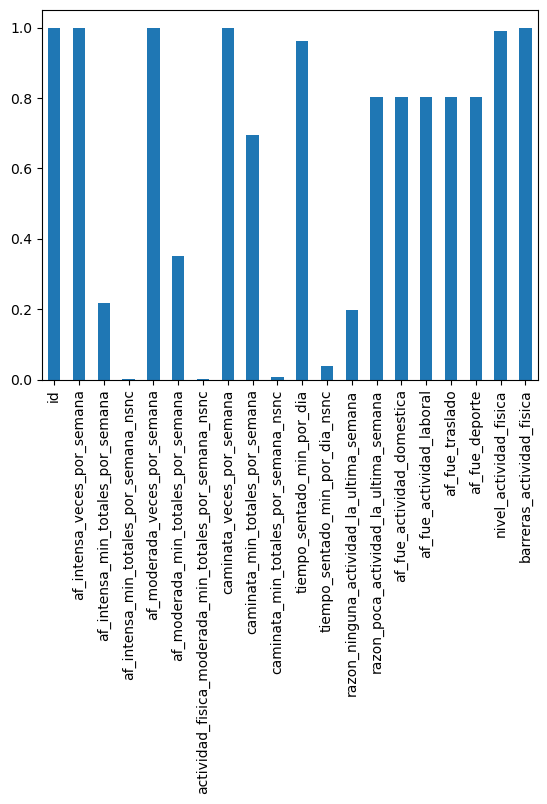

In [58]:
#Gráficamente, ver la proporción de valores no nulos en cada columna
a1_actividad_fisica=(actividad_fisica_raw.notna().sum(axis = 0)  /  len(actividad_fisica_raw))
a1_actividad_fisica.plot.bar()

De este subset se aconseja mantener para el análisis a las columnas: 
"razon_ninguna_actividad_la_ultima_semana"
"razon_poca_actividad_la_ultima_semana"
"nivel_actividad_fisica"
"barreras_actividad_fisica"

### TABAQUISMO

__Creación de nuevas columnas__

In [25]:
# Cálculo de nueva columna cant_tipos_tabaco
# Se crea una nueva columna cant_tipos_tabaco que contiene la cantidad de tipos de tabaco que la persona consume.

# Subconjunto de columnas donde queremos contar los 1s
columnas_subconjunto = ['bita09_01', 'bita09_02', 'bita09_03', 'bita09_04', 'bita09_05', 'bita09_06']

# Llamar a la función con el subconjunto de columnas
tabaquismo_raw.loc[:, 'cant_tipos_tabaco'] = calcular_tipos_tabaco(tabaquismo_raw, columnas_subconjunto)

__Renombre de columnas__

In [26]:
# Renombro columnas
tabaquismo_raw.rename(columns = {
    'bita01':               'es_fumador',                                       # var categorica
    'bita02':               'edad_fuma_primera_vez',                            # var numerica discreta
    'bita02_99':            'edad_fuma_primera_vez_ns_nc',                      # var numerica discreta
    'bita03':               'fumado_100_cigarrillos',                           # var categorica
    'bita04':               'periodicidad_fumador',                             # var ordinal
    'bita04_01':            'es_cigarrillo_armado',                             # var categorica
    'bita04_02':            'es_cigarrillo_paquete',                            # var categorica
    'bita05':               'marca_cigarrillos',                                # var categorica
    'bita06_a':             'tipo_paquete_comprado',                            # var categorica
    'bita06_b':             'cant_cigarrillos_comprados',                       # var numerica discreta
    'bita06_b_99':          'cant_cigarrillos_comprados_ns_nc',                 # var numerica discreta
    'bita06_c':             'cigarrillos_sabor',                                # var categorica
    'bita06_d':             'cigarrillos_tipo_capsula',                         # var categorica
    'bita07':               'dinero_pagado_ultima_compra_cigarrillos',          # var numerica discreta
    'bita07_99':            'dinero_pagado_ultima_compra_cigarrillos_ns_nc',    # var categorica
    'bita08':               'intento_dejar_fumar',                              # var categorica
    'bita09_01':            'es_fumador_cigarro_habano',                        # var categorica
    'bita09_02':            'es_fumador_cigarritos',                            # var categorica
    'bita09_03':            'es_fumador_pipa_comun',                            # var categorica
    'bita09_04':            'es_fumador_pipa_agua',                             # var categorica
    'bita09_05':            'es_fumador_tabaco_masticar',                       # var categorica
    'bita09_06':            'es_fumador_cigarrillo_electronico',                # var categorica
    'bita10_01':            'hubo_fumadores_casa',                              # var categorica
    'bita10_02':            'hubo_fumadores_trabajo',                           # var categorica
    'bita10_03':            'hubo_fumadores_escuela',                           # var categorica
    'bita10_04':            'hubo_fumadores_restaurant',                        # var categorica
    'bita10_05':            'hubo_fumadores_hospital',                          # var categorica
    'bita10_06':            'hubo_fumadores_otros_lugares',                     # var categorica
    'bita11':               'publicidad_comercios',                             # var categorica
    'bita12':               'publicidad_email',                                 # var categorica
    'bita13':               'suscripcion_cigarrera',                            # var categorica
    'bita14':               'vio_propaganda_riesgo_fumar',                      # var categorica
    'bita15':               'propaganda_piensa_dejar_fumar',                    # var categorica
    'bita16':               'acuerdo_impuesto_tabaco',                           # var categorica
    'consumo_tabaco_100':   'condicion_fumador'
}, inplace = True)

### HIPERTENSION ARTERIAL

In [27]:
# Renombre de columnas
hipertension_raw.rename(columns = {
    #HIPERTENSION ARTERIAL ha
"biha01" : "hay_medicion_ha",
"biha02" : "tiempo_ultima_medicion_ha",
"biha03" : "cantidad_mediciones_ha_alta",
"biha04" : "actualmente_en_tratamiento",
"biha05_01" : "tratamiento_estilodevida",
"biha05_02" : "tratamiento_medicacion",
"biha06" : "cantidad_pastillas_ha_diarias",
"biha06_99" : "cantidad_pastillas_ha_diarias_nsnc",
"biha07" : "alguna_vez_olvido_medicacion_ha",
"biha08" : "deja_medicacion_ha_por_bienestar",
"biha09" : "deja_medicacion_ha_por_malestar",
"biha10" : "cumplimiento_medicacion_ha_ultima_semana",
"biha11" : "cantidad_pastillas_ha_olvidadas_ultima_semana",
"biha11_99" : "cantidad_pastillas_ha_olvidadas_ultima_semana_nsnc",
"biha12" : "realiza_otros_controles_ha",
"biha13" : "donde_realiza_otros_controles_ha",
"biha14" : "otros_controles_ha_con_seguimiento_profesional",
"biha15" : "otros_controles_ha_considera_historia_clinica",
"control_hipertension" : "control_ha_profesional_ultimos_2_anios",
"prevalencia_hipertension" : "mantiene_ha_alta" 

}, inplace = True)

In [62]:
hipertension_raw.head()

,id,hay_medicion_ha,tiempo_ultima_medicion_ha,cantidad_mediciones_ha_alta,actualmente_en_tratamiento,tratamiento_estilodevida,tratamiento_medicacion,cantidad_pastillas_ha_diarias,cantidad_pastillas_ha_diarias_nsnc,alguna_vez_olvido_medicacion_ha,deja_medicacion_ha_por_bienestar,deja_medicacion_ha_por_malestar,cumplimiento_medicacion_ha_ultima_semana,cantidad_pastillas_ha_olvidadas_ultima_semana,cantidad_pastillas_ha_olvidadas_ultima_semana_nsnc,realiza_otros_controles_ha,donde_realiza_otros_controles_ha,otros_controles_ha_con_seguimiento_profesional,otros_controles_ha_considera_historia_clinica,control_ha_profesional_ultimos_2_anios
0,1128639,1,1.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,1709939,1,1.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,6874130,1,1.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,10319375,1,2.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,11140857,1,1.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [63]:
#Análisis de nulos
hipertension_raw.isnull().sum(axis = 0)

id                                                        0
hay_medicion_ha                                           0
tiempo_ultima_medicion_ha                              2082
cantidad_mediciones_ha_alta                               0
actualmente_en_tratamiento                            18791
tratamiento_estilodevida                              23511
tratamiento_medicacion                                23511
cantidad_pastillas_ha_diarias                         24009
cantidad_pastillas_ha_diarias_nsnc                    29201
alguna_vez_olvido_medicacion_ha                       23986
deja_medicacion_ha_por_bienestar                      23986
deja_medicacion_ha_por_malestar                       23986
cumplimiento_medicacion_ha_ultima_semana              23986
cantidad_pastillas_ha_olvidadas_ultima_semana         28993
cantidad_pastillas_ha_olvidadas_ultima_semana_nsnc    29178
realiza_otros_controles_ha                            18791
donde_realiza_otros_controles_ha        

<Axes: >

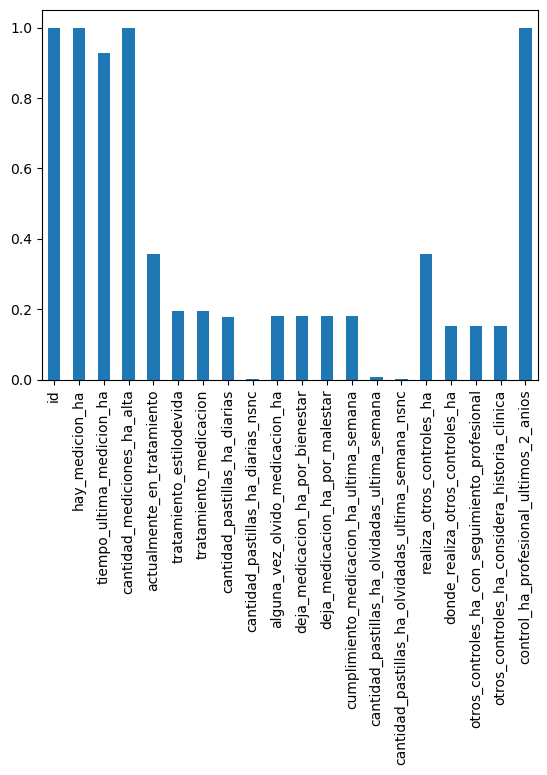

In [64]:
#Gráficamente, ver la proporción de valores no nulos en cada columna
a1_hipertension=(hipertension_raw.notna().sum(axis = 0)  /  len(hipertension_raw))
a1_hipertension.plot.bar()

Los nulos no se deben a un error o una falta de datos, se deben a individuos a los cuales no aplica la pregunta de dicha columna, porque repondieron no a una pregunta determinante anterior. Por ejemplo:
La pregunta  "alguna_vez_olvido_medicacion_ha" no tendrán respuesta para las personas que respondieron NO a la pregunta "tratamiento_medicación" 
En caso de una persona que responde sí a una pregunta troncal pero no responde una pregunta consecuente, existen las columnas NoSabeNoContesta ("..._nsnc"), por ejemplo "cantidad_pastillas_ha_diarias_nsnc".
Comprobamos estas afirmaciones comparando algunas columnas

In [65]:
#Una pregunta troncal, y la cantidad de personas que respondieron SI (1) o NO (2)
#   ¿Toma medicación para la hipertensión?
hipertension_raw.tratamiento_medicacion.value_count()

AttributeError: 'Series' object has no attribute 'value_count'

In [ ]:
#La cantidad de valores no nulos (personas que respondieron ésta pregunta, sin importar con cual respuesta) que hay en la columna de la pregunta consecuente 
#   ¿Alguna vez olvidó tomar la medicación?
hipertension_raw.alguna_vez_olvido_medicacion_ha.count()

Las culumnas con gran proporción de valores NaN no necesariamente contienen errores, tienen información de un subgrupo de personas que coinciden en cierta variable, por ejemplo los que sí toman medicación para la hipertensión. 
Si desean incluirse en un análisis, debe considerarse que el tamaño de la muesta es considerablemente menor.

De este subset se aconseja mantener para el análisis a las columnas: 
"control_ha_profesional_ultimos_2_anios"
"prevalencia_hipertension" 
"tiempo_ultima_medicion_ha"
"cantidad_mediciones_ha_alta"
"actualmente_en_tratamiento"
"tratamiento_estilodevida"
"tratamiento_medicacion"
"alguna_vez_olvido_medicacion_ha"

### PESO CORPORAL

In [28]:
# Renombro columnas
peso_raw.rename(columns = {
    #PESO CORPORAL
"bipc01" : "profesional_indico_bajar_peso",
"bipc02" : "actualmente_bajando_peso",
"bipc03" : "actualmente_manteniendo_peso",
"bipc04" : "peso_autoreportado_kg",
"bipc04_99" : "peso_autoreportado_kg_nsnc",
"bipc05" : "altura_autoreportado_cm",
"bipc05_99" : "altura_autoreportado_cm_nsnc"
#"imc" mantiene el mismo nombre
#"imc_categorias" mantiene el mismo nombre
}, inplace = True)

<Axes: >

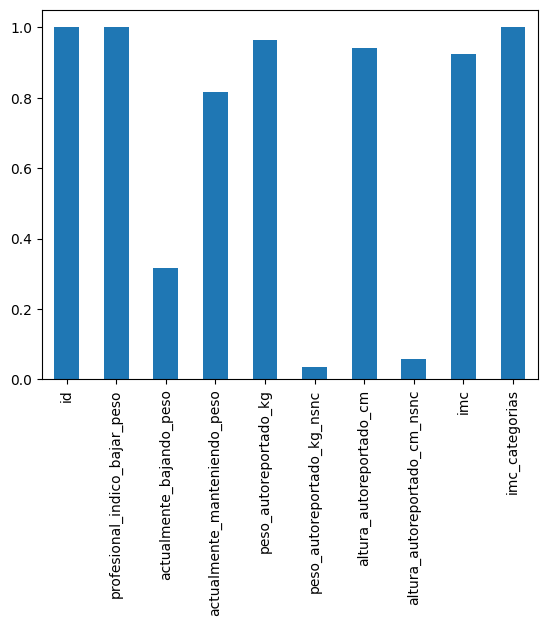

In [ ]:
#Gráficamente, ver la proporción de valores no nulos en cada columna
a1_peso=(peso_raw.notna().sum(axis = 0)  /  len(peso_raw))
a1_peso.plot.bar()

De este subset se aconseja mantener para el análisis a las columnas: 
"imc"
"imc_categorias"

### ALIMENTACION

In [29]:
alimentacion_raw.rename(columns={
    'bial01': 'sal1',
    'bial02': 'sal2',
    'bial03': 'consumo_semanal_futas',
    'bial08': 'ranking_dieta',
    'promedio_fv_diario': 'media_fv_diaria'
}, inplace=True)

In [30]:
#creo una tabla auxiliar para poder iterar solo en las columnas de mi interes
columnas_sal = alimentacion_raw.iloc[:,[1,2]]

In [31]:
#creo una nueva columna que combine sal1 y sal2 para hacer una columna que mida el consumo de sal
consumo_sal = []
for row in columnas_sal.itertuples():
   suma = row.sal1 + row.sal2
   if (suma <= 50):
      consumo_sal.append(suma)
   elif (suma >= 100):
      consumo_sal.append(suma - 97)
   else:
      consumo_sal.append('valor no tomado en cuenta')

In [32]:
#inserto la columna nueva en la tabla original y le inserto los valores que calcule anteriormente
alimentacion_raw.insert(3, column='consumo_sal', value=consumo_sal)
alimentacion_raw.columns

Index(['id', 'sal1', 'sal2', 'consumo_sal', 'consumo_semanal_futas',
       'bial03_99', 'bial04', 'bial04_99', 'bial05', 'bial05_99', 'bial06',
       'bial06_99', 'bial07', 'ranking_dieta', 'bial09', 'bial10',
       'media_fv_diaria', 'consumo_fv', 'barreras_fyv'],
      dtype='object')

In [33]:
# filtro columnas
alimentacion = alimentacion_raw.filter(items=['id','consumo_sal', 'consumo_semanal_futas', 'ranking_dieta','media_fv_diaria'])
alimentacion.head()

,id,consumo_sal,consumo_semanal_futas,ranking_dieta,media_fv_diaria
0,1128639,5,7.0,2,4.00
1,1709939,4,7.0,2,6.43
2,6874130,2,5.0,2,2.86
3,10319375,3,3.0,2,1.43
4,11140857,4,7.0,2,1.43


### COLESTEROL

In [34]:
# Renombro las columnas 
colesterol_raw.rename( columns={
    'bico01': 'medido_colesterol',
    'bico02': 'fecha_med_colesterol',
    'bico03': 'colesterol_alto',
    'bico04': 'tratamiento_medico_col',
    'bico05_01': 'trat_habitos_col',
    'bico05_02': 'trat_farmac_col',
    'control_colesterol': 'autocontrol_col'
}, inplace= True)

In [35]:
colesterol = colesterol_raw.filter(items=['id','medido_colesterol','colesterol_alto','tratamiento_medico_col'])

### CONSUMO DE ALCOHOL

In [36]:
consumo_alcohol_raw

,id,bica01,bica02,bica03_01,bica03_02,bica03_99,bica04_01_b,bica04_01_c,bica04_02_b,bica04_02_c,bica04_03_b,bica04_03_c,bica04_04,bica05_01_b,bica05_01_c,bica05_02_b,bica05_02_c,bica05_03_b,bica05_03_c,bica05_04,bica06,bica07,consumo_regular_riesgo
0,1128639,1,1.0,1.0,NaN,NaN,1.0,NaN,NaN,98.0,NaN,98.0,2.0,3.0,NaN,1.0,NaN,NaN,98.0,2.0,2.0,2,2.0
1,1709939,1,1.0,NaN,1.0,NaN,NaN,98.0,1.0,NaN,NaN,98.0,2.0,NaN,98.0,NaN,98.0,NaN,98.0,2.0,2.0,2,2.0
2,6874130,1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0
3,10319375,1,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0
4,11140857,1,1.0,1.0,NaN,NaN,1.5,NaN,NaN,98.0,NaN,98.0,2.0,NaN,98.0,NaN,98.0,NaN,98.0,2.0,2.0,99,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29219,2092256226,1,1.0,1.0,NaN,NaN,6.0,NaN,NaN,98.0,NaN,98.0,2.0,12.0,NaN,NaN,98.0,NaN,98.0,2.0,2.0,2,2.0
29220,2097771079,1,1.0,1.0,NaN,NaN,1.7,NaN,1.0,NaN,NaN,98.0,2.0,NaN,98.0,NaN,98.0,NaN,98.0,2.0,2.0,1,2.0
29221,2101464264,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0
29222,2116612011,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0


In [37]:
# Renombro las columnas
consumo_alcohol_raw.rename( columns = {
    'bica01': 'ha_consumido_alc',
    'bica02': 'fecha_ult_cons',
    'bica03_01': 'freq_30_ds',
    'bica03_02': 'freq_30_dm',
    'bica03_99': 'freq_30_nsnc',
    'bica04_01_b': 'tragos_cerveza',
    'bica04_01_c': 'tragos_cerveza_notoma',
    'bica04_02_b': 'tragos_vino',
    'bica04_02_c': 'tragos_vino_notoma',
    'bica04_03_b': 'tragos_bebida_fuerte',
    'bica04_03_c': 'tragos_bebida_fuerte_notoma',
    'bica04_04': 'toma_otras_bebidas',
    'bica05_01_b': 'sobrecon_cant_cerveza',
    'bica05_01_c': 'sobrecon_cerv_notoma',
    'bica05_02_b': 'sobrecon_cant_vino',
    'bica05_02_c': 'sobrecon_vino_notoma',
    'bica05_03_b': 'sobrecon_cant_bebfuerte',
    'bica05_03_c': 'sobrecon_bebfuerte_notoma',
    'bica05_04': 'sobrecon_otrasb',
    'bica06': 'manejo_alcholizado30',
    'bica07': 'aprueba_aumento_imp_alchol'
}, inplace= True)

In [38]:
# Voy a comenzar filtrando solo los consumos dentro de 30 dias que son los que me importan
# asigno valor nan a los ns/nc
reemplazos = {
    99:np.nan
}
consumo_alcohol_raw['fecha_ult_cons'] = consumo_alcohol_raw['fecha_ult_cons'].replace(reemplazos)
consumo_alcohol_raw['ha_consumido_alc'] = consumo_alcohol_raw['ha_consumido_alc'].replace(reemplazos)


In [39]:
# Ahora voy a convertir la columna de dias a la semana a dias al mes y combinarlas en una'freq_30_dm 'freq_30_ds'
consumo_alcohol_raw.freq_30_ds = consumo_alcohol_raw.freq_30_ds * 4

In [ ]:
consumo_alcohol_raw.head()

,id,ha_consumido_alc,fecha_ult_cons,freq_30_ds,freq_30_dm,freq_30_nsnc,tragos_cerveza,tragos_cerveza_notoma,tragos_vino,tragos_vino_notoma,tragos_bebida_fuerte,tragos_bebida_fuerte_notoma,toma_otras_bebidas,sobrecon_cant_cerveza,sobrecon_cerv_notoma,sobrecon_cant_vino,sobrecon_vino_notoma,sobrecon_cant_bebfuerte,sobrecon_bebfuerte_notoma,sobrecon_otrasb,manejo_alcholizado30,aprueba_aumento_imp_alchol,consumo_regular_riesgo
0,1128639,1.0,1.0,4.0,NaN,NaN,1.0,NaN,NaN,98.0,NaN,98.0,2.0,3.0,NaN,1.0,NaN,NaN,98.0,2.0,2.0,2,2.0
1,1709939,1.0,1.0,NaN,1.0,NaN,NaN,98.0,1.0,NaN,NaN,98.0,2.0,NaN,98.0,NaN,98.0,NaN,98.0,2.0,2.0,2,2.0
2,6874130,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0
3,10319375,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0
4,11140857,1.0,1.0,4.0,NaN,NaN,1.5,NaN,NaN,98.0,NaN,98.0,2.0,NaN,98.0,NaN,98.0,NaN,98.0,2.0,2.0,99,2.0


In [40]:
#uno las dos columnas en una nueva
consumo_alcohol_raw['consumo_mensual'] = consumo_alcohol_raw.freq_30_dm.combine_first(consumo_alcohol_raw.freq_30_ds)

In [41]:
# Filtro solo las columnas utiles en una tabla auxiliar, con esperanza de optimizar el proceso de creacion de la tabla de frecuencia de consumo
tabla_aux_ca = consumo_alcohol_raw.filter(items=['id','ha_consumido_alc', 'fecha_ult_cons','consumo_mensual'])
tabla_aux_ca.sample(5)

,id,ha_consumido_alc,fecha_ult_cons,consumo_mensual
2322,923983417,2.0,NaN,NaN
28967,437475592,1.0,1.0,3.0
22097,1168455588,1.0,1.0,4.0
27213,445134478,2.0,NaN,NaN
24193,1934136795,1.0,2.0,NaN


In [42]:
# Chequeo los valores que componen cada una de mis columnas
print(tabla_aux_ca.ha_consumido_alc.unique())
print(tabla_aux_ca.fecha_ult_cons.unique())
print(tabla_aux_ca.consumo_mensual.unique())

[ 1.  2. nan]
[ 1.  2.  3. nan]
[ 4.  1. nan 12.  2. 28. 30.  8. 20. 16.  7.  3.  6. 15. 10.  5. 24. 25.
  9. 13. 14. 26.]


In [43]:
def calcular_frecuencia_detallada(row):
    if row["ha_consumido_alc"] == 2:
        return 100
    elif row["ha_consumido_alc"] == 1:
        if pd.isna(row["fecha_ult_cons"]):
            return 404
        elif row["fecha_ult_cons"] == 3:
            return 200
        elif row["fecha_ult_cons"] == 2:
            return 300
        elif row["fecha_ult_cons"] == 1:
            if pd.isna(row['consumo_mensual']):
                return 404
            consumo_mensual = int(row['consumo_mensual'])
            if consumo_mensual >= 15:
                return 400
            else:
                return 500
    return 404

In [44]:
tabla_aux_ca['freq_cons_alc'] = tabla_aux_ca.apply(calcular_frecuencia_detallada, axis=1)
tabla_aux_ca.sample(5)

,id,ha_consumido_alc,fecha_ult_cons,consumo_mensual,freq_cons_alc
7538,643569814,1.0,1.0,24.0,400
4635,689114307,1.0,1.0,28.0,400
676,1053511349,2.0,NaN,NaN,100
14515,1587307206,1.0,1.0,1.0,500
24354,217102062,1.0,3.0,NaN,200


In [45]:
#agrego mi columna calculada y chekeada a la tabla de alcolismo
consumo_alcohol_raw = pd.merge(consumo_alcohol_raw,tabla_aux_ca, how='left',on='id')

__Ahora combino las columnas para los tipos de bebida__

In [46]:
# Primero defino una funcion, que como indica, transforma en 1 la columna correspondiente a los tragos de x bebidas, y en 0 las respuestas positivas a no toma x bebida y luego las combina en 1 para indicar si toma o no esa bebida

def combinar_y_transformar(col1, col2):
    transformacioncol1 = col1.apply(lambda x: 1 if pd.notna(x) else x)
    transformacioncol2 = col2.apply(lambda x: 0 if pd.notna(x) else x)
    combinacioncols = transformacioncol1.combine_first(transformacioncol2)
    return combinacioncols

In [47]:
# Creo una columna para cada bebida para indicar 1: si toma, 0: si no toma esa bebida
consumo_alcohol_raw['consumo_vino'] = combinar_y_transformar(consumo_alcohol_raw.tragos_vino,consumo_alcohol_raw.tragos_vino_notoma)
consumo_alcohol_raw['consumo_cerveza'] = combinar_y_transformar(consumo_alcohol_raw.tragos_cerveza,consumo_alcohol_raw.tragos_cerveza_notoma)
consumo_alcohol_raw['consumo_bebidas_fuertes'] = combinar_y_transformar(consumo_alcohol_raw.tragos_bebida_fuerte, consumo_alcohol_raw.tragos_bebida_fuerte_notoma)

In [48]:
# Reemplazo los valores 2 por 0, para que concuerden con las otras categorias (use 1 y 0 para facilitar calculos posteriores)
consumo_alcohol_raw['toma_otras_bebidas'] = consumo_alcohol_raw['toma_otras_bebidas'].replace(2,0)

__Voy a utilizar las siguientes columnas__
'id',''freq_cons_alc','consumo_vino', 'consumo_cerveza', 'consumo_bebidas_fuertes', 'toma_otras_bebidas'

In [49]:
# Defino la funcion para determiar si toma una o varias bebidas
def combinar_consumo(row):
    bebidas = []
    if row['consumo_vino'] == 1:
        bebidas.append(1)
    if row['consumo_cerveza'] == 1:
        bebidas.append(2)
    if row['consumo_bebidas_fuertes'] == 1:
        bebidas.append(3)
    if row['toma_otras_bebidas'] == 1:
        bebidas.append(4) 
    if len(bebidas) == 0:
        return np.nan
    elif len(bebidas) == 1:
        return bebidas[0]
    else:
        return 5

In [50]:
# Creo la columna con los tipos de bebidas 
consumo_alcohol_raw['tipo_bebida'] = consumo_alcohol_raw.apply(combinar_consumo, axis=1)

In [51]:
consumo_alcohol = consumo_alcohol_raw.filter(items=['id','freq_cons_alc','tipo_bebida'])

In [52]:
consumo_alcohol

,id,freq_cons_alc,tipo_bebida
0,1128639,500,2.0
1,1709939,500,1.0
2,6874130,300,NaN
3,10319375,200,NaN
4,11140857,500,2.0
...,...,...,...
29219,2092256226,500,2.0
29220,2097771079,500,5.0
29221,2101464264,100,NaN
29222,2116612011,100,NaN


### DIABETES

__Creación de nuevas columnas__

In [53]:
# Crear una nueva columna para diagnostico en cosanguineos
''' Resultados posibles
   bidi06_01  bidi06_02    diagnostico_cosanguineos
0        1.0        1.0        cosanguineo_primario
1        2.0        2.0        sin_antecedentes
2        NaN        1.0        cosanguineo_secundario
3        1.0        NaN        cosanguineo_primario
4        2.0        NaN        sin_antecedentes
5        NaN        2.0        sin_antecedentes
6        1.0        2.0        cosanguineo_primario
7        2.0        1.0        cosanguineo_secundario
8        NaN        NaN        ns_nc
'''
diabetes_raw['diagnostico_cosanguineos'] = np.where(
    diabetes_raw['bidi06_01'] == 1, 'cosanguineo_primario',
    np.where(
        (diabetes_raw['bidi06_01'] != 1) & (diabetes_raw['bidi06_02'] == 1), 'cosanguineo_secundario',
        np.where(
            (diabetes_raw['bidi06_01'] == 2) | (diabetes_raw['bidi06_02'] == 2), 'sin_antecedentes',
            'ns_nc'
        )
    )
)

__Renombre de columnas__

In [54]:
# Renombrar columnas
diabetes_raw.rename(columns = {
    'bidi01':               'es_diabetico',                                     # var categorica
    'bidi02':               'es_diabetes_gestacional',                          # var categorica
    'bidi03':               'en_tratamiento_diabetes',                          # var categorica
    'bidi04_01':            'en_tratamiento_diabetes_insulina',                 # var categorica
    'bidi04_02':            'en_tratamiento_diabetes_otros',                    # var categorica
    'bidi04_03':            'en_tratamiento_diabetes_medicamentos',             # var categorica
    'bidi05':               'es_insulinodependiente',                           # var categorica
    'bidi06_01':            'diagnostico_diabetes_cosanguineo_primario',        # var categorica
    'bidi06_02':            'diagnostico_diabetes_cosanguineo_secundario',      # var categorica
    'bidi07':               'ultima_medicion_glucemia',                         # var categorica
    'bidi08':               'controla_diabetes',                                # var categorica
    'bidi09':               'lugar_control_diabetes',                           # var categorica
    'bidi10':               'atencion_diabetes_mismo_profesional',              # var categorica
    'bidi11':               'atencion_diabetes_hc',                             # var categorica
    'bidi12':               'revision_pies',                                    # var categorica
    'bidi13':               'revision_pupilas',                                 # var categorica
    'bidi14':               'educado_control_diabetes',                         # var categorica
}, inplace = True)

### MEDICIONES ANTROPOMÉTRICAS

__Renombre de columnas__

In [55]:
# Renombro columnas
mediciones_antropometricas_raw.rename(columns = {
    'bima01':               'consentimiento_ma',                                # var categorica
    'bima02':               'bebio_cafeina',                                    # var categorica
    'bima03':               'consentimiento_presion',                           # var categorica
    'bima04_01_a':          'primera_medicion_sistolica',                       # var numerica continua
    'bima04_01_b':          'primera_medicion_diastolica',                      # var numerica continua
    'bima04_02_a':          'segunda_medicion_sistolica',                       # var numerica continua
    'bima04_02_b':          'segunda_medicion_diastolica',                      # var numerica continua
    'bima04_03_a':          'tercera_medicion_sistolica',                       # var numerica coninua
    'bima04_03_b':          'tercera_medicion_diastolica',                      # var numerica continua
    'ta_elevada':           'presion_arterial_elevada',                         # var categorica
    'bima06':               'consentimiento_altura',                            # var categorica
    'bima07':               'medicion_altura',                                  # var numerica continua
    'bima09':               'consentimiento_peso',                              # var categorica
    'bima10':               'medicion_peso',                                    # var numerica continua
    'bima12':               'consentimiento_cintura',                           # var categorica
    'bima13':               'medicion_cintura',                                 # var numerica continua
    'bima14':               'tipo_medicion_cintura',                            # var categorica
    'imc_bima':             'imc',                                              # var categorica
    'imc_categorias_bima':  'imc_categoria'                                     # var categorica
}, inplace = True)

### MEDICIONES BIOQUÍMICAS

__Renombre de columnas__

In [56]:
# Renombro columnas
mediciones_bioquimicas_raw.rename(columns = {
    'bimq01':               'consentimiento_bq',                                # var categorica
    'bimq05':               'medicion_glucosa',                                 # var numerica continua
    'bimq05_01':            'medicion_glucosa_no_registrada',                   # var categorica
    'bimq06':               'medicion_colesterol',                              # var numerica continua
    'bimq06_01':            'medicion_colesterol_no_registrada'                 # var categorica                                  # var categorica
}, inplace = True)

### Unión de bloques temáticos en dataset util/ final

Aqui se combinan las tablas correspondientes a cada bloque temático ya acondicionadas, para crear el dataset sobre el que se trabajará posteriormente. 

In [57]:
# Lista de los dataframes a unir
dfs = [
    ubicacion,
    caract_encuestado,
    tabaquismo_raw,
    diabetes_raw,
    alimentacion,
    colesterol,
    consumo_alcohol,
    mediciones_antropometricas_raw,
    mediciones_bioquimicas_raw
]

# Union de dataframes por la columna 'id', utilizando 'inner join' como metodo de union
friesgo_2018 = reduce(lambda left, right: pd.merge(left, right, on='id', how='inner'), dfs)

# Se verifica que el dataframe resultante contiene la misma cantidad de filas que el dataframe original
print(friesgo_2018_raw.shape)
print(friesgo_2018.shape)

(29224, 287)
(29224, 103)


In [58]:
# Exportacion a CSV del dataframe resultante para ser utilizado en el EDA
friesgo_2018.to_csv('datasets/friesgo_2018.csv', index=False)

#### ignoren esta seccion despues sera borrada


In [ ]:
#filtro
salud = salud_raw.copy()
tabaquismo = tabaquismo_raw.filter(items=['id','edad_fuma_primera_vez','fumado_100_cigarrillos','cant_tipos_tabaco','condicion_fumador']).copy()
diabetes = diabetes_raw.filter(items=['id', 'es_diabetico', 'es_diabetes_gestacional','en_tratamiento_diabetes','diagnostico_cosanguineos','control_diabetes']).copy()
mediciones_antropometricas = mediciones_antropometricas_raw.filter(items=['id','bebio_cafeina','presion_arterial_elevada','imc_categoria','medicion_cintura']).copy()
mediciones_bioquimicas = mediciones_bioquimicas_raw.filter(items=['id','glucemia_elevada','colesterol_elevado']).copy()
actividad_fisica = actividad_fisica_raw.filter(items=['id','af_intensa_veces_por_semana','af_moderada_veces_por_semana','caminata_veces_por_semana','tiempo_sentado_min_por_dia','nivel_actividad_fisica']).copy()
peso_corporal = peso_raw.filter(items=['id', 'profesional_indico_bajar_peso','imc_categorias']).copy()
hipertension = hipertension_raw.filter(items=['id','tiempo_ultima_medicion_ha', 'cantidad_mediciones_ha_alta','actualmente_en_tratamiento']).copy()


In [ ]:
# copia del df
# Lista de los dataframes a unir
dfs2 = [
    ubicacion,
    caract_encuestado,
    salud,
    actividad_fisica,
    tabaquismo,
    hipertension,
    peso_corporal,
    alimentacion,
    colesterol,
    consumo_alcohol,
    diabetes_raw,
    mediciones_antropometricas,
    mediciones_bioquimicas
]
friesgo_2018_BB = reduce(lambda left, right: pd.merge(left, right, on='id', how='inner'), dfs2)

In [ ]:
# Exportacion a CSV del dataframe resultante para ser utilizado en el EDA
friesgo_2018_BB.to_csv('datasets/friesgo_2018_BB.csv', index=False)